# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import random
df = pd.read_csv('DATA/matches2020.csv')
df

,Unnamed: 0,gameid,league,blueteam,redteam,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,0,ESPORTSTMNT03/1241318,KeSPA,SANDBOX Gaming,T1,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,1,ESPORTSTMNT03/1241322,KeSPA,T1,SANDBOX Gaming,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,2,ESPORTSTMNT03/1241324,KeSPA,T1,SANDBOX Gaming,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,3,ESPORTSTMNT03/1241328,KeSPA,T1,SANDBOX Gaming,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,4,ESPORTSTMNT03/1241386,KeSPA,DRX,Afreeca Freecs,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,5607,ESPORTSTMNT03/1433741,LCS,FlyQuest,Team SoloMid,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,5608,ESPORTSTMNT03/1433748,LCS,FlyQuest,Team SoloMid,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,5609,ESPORTSTMNT03/1433749,LCS,Team SoloMid,FlyQuest,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,5610,ESPORTSTMNT03/1433751,LCS,FlyQuest,Team SoloMid,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


In [2]:
df.dtypes
df = df.drop(columns=["Unnamed: 0","gameid","league","blueteam","redteam"])
df.count()

bluetop        5612
bluejungle     5612
bluemid        5612
blueadc        5612
bluesupport    5612
redtop         5612
redjungle      5612
redmid         5612
redadc         5612
redsupport     5612
result         5612
dtype: int64

In [3]:
df = df.dropna()
df

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...
5607,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


### Load Hashmap

In [4]:
df_c = pd.read_csv('DATA/champion_stats.csv')

champkeys = {}

for i in range(len(df_c["key"])):
    champkeys[df_c["key"][i]] = df_c["id"][i]

champkeys

{266: 'Aatrox',
 103: 'Ahri',
 84: 'Akali',
 12: 'Alistar',
 32: 'Amumu',
 34: 'Anivia',
 1: 'Annie',
 523: 'Aphelios',
 22: 'Ashe',
 136: 'AurelionSol',
 268: 'Azir',
 432: 'Bard',
 53: 'Blitzcrank',
 63: 'Brand',
 201: 'Braum',
 51: 'Caitlyn',
 164: 'Camille',
 69: 'Cassiopeia',
 31: 'Chogath',
 42: 'Corki',
 122: 'Darius',
 131: 'Diana',
 119: 'Draven',
 36: 'DrMundo',
 245: 'Ekko',
 60: 'Elise',
 28: 'Evelynn',
 81: 'Ezreal',
 9: 'Fiddlesticks',
 114: 'Fiora',
 105: 'Fizz',
 3: 'Galio',
 41: 'Gangplank',
 86: 'Garen',
 150: 'Gnar',
 79: 'Gragas',
 104: 'Graves',
 120: 'Hecarim',
 74: 'Heimerdinger',
 420: 'Illaoi',
 39: 'Irelia',
 427: 'Ivern',
 40: 'Janna',
 59: 'JarvanIV',
 24: 'Jax',
 126: 'Jayce',
 202: 'Jhin',
 222: 'Jinx',
 145: 'Kaisa',
 429: 'Kalista',
 43: 'Karma',
 30: 'Karthus',
 38: 'Kassadin',
 55: 'Katarina',
 10: 'Kayle',
 141: 'Kayn',
 85: 'Kennen',
 121: 'Khazix',
 203: 'Kindred',
 240: 'Kled',
 96: 'KogMaw',
 7: 'Leblanc',
 64: 'LeeSin',
 89: 'Leona',
 876: 'Lilli

### Ranked Data

In [5]:
md = pd.read_csv('DATA/match_data_version1.csv')
md

,Unnamed: 0,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status.message,status.status_code
0,0,1.585155e+12,1323.0,4.247263e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
1,1,1.585152e+12,1317.0,4.247156e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
2,2,1.585059e+12,932.0,4.243963e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
3,3,1.584978e+12,2098.0,4.241678e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
4,4,1.584973e+12,2344.0,4.241539e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108824,0,1.579163e+12,1029.0,4.088497e+09,URF,MATCHED_GAME,10.1.303.9385,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,900.0,13.0,NaN,NaN
108825,0,1.580823e+12,1544.0,4.130964e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
108826,0,1.580382e+12,2090.0,4.119954e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
108827,0,1.580805e+12,1382.0,4.130440e+09,URF,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,900.0,13.0,NaN,NaN


In [ ]:
#print(md["participants"][0])

df_r = df.copy()
for i in range(len(md["gameMode"])):
    if(i%1000 == 0):
        print(i)
        
    if(md["gameMode"][i] == "CLASSIC"):
        
        # get the champions
        next_index = len(df['bluetop'])
        #print(next_index)
        string = md["participants"][i]
        loc = 0
        loc_p = 0
        loc_l = 0
        loc_w = 0
        
        bt_f = False
        bm_f = False
        bs_f = False
        bb_f = False
        bj_f = False
        
        rt_f = False
        rm_f = False
        rs_f = False
        rb_f = False
        rj_f = False
        
        for p in range(10):
            
            #get win
            if(p == 0):
                loc_w = string.find("win", (loc_w+1), len(string)-1)
                won = string[loc_w+6:loc_w+10]
                bwin = 0
                if(won.lower() == "true"):
                    bwin = 1
            
            #get champ id
            loc = string.find("championId", (loc+1), len(string)-1)
            space = string.find(",", (loc+13), len(string)-1)
            try:
                champid = int(string[loc+13:space])
            except ValueError as err:
                print("err")
            
            #get position
            loc_p = string.find("role", (loc_p+1), len(string)-1)
            support = string[loc_p+12:loc_p+19]
            loc_l = string.find("lane", (loc_l+1), len(string)-1)
            lane = string[loc_l+8]
            #print(lane)
            #champid = string[loc+13:space]
            
            if(p < 5 and support == "SUPPORT"):
                df.at[next_index, "bluesupport"] = champkeys[champid]
                #print("bS: ", champkeys[champid])
                
            elif(p < 5 and support != "SUPPORT"):
                if(p < 5 and lane == "B"):
                    df.at[next_index, "blueadc"] = champkeys[champid]
                    #print("bB: ", champkeys[champid])
                elif(p < 5 and lane == "J"):
                    df.at[next_index, "bluejungle"] = champkeys[champid]
                    #print("bJ: ", champkeys[champid])
                elif(p < 5 and lane == "M"):
                    df.at[next_index, "bluemid"] = champkeys[champid]
                    #print("bM: ", champkeys[champid])
                elif(p < 5 and lane == "T"):
                    df.at[next_index, "bluetop"] = champkeys[champid]
                    #print("bT: ", champkeys[champid])
                
            if(p >= 5 and support == "SUPPORT"):
                df.at[next_index, "redsupport"] = champkeys[champid]
                #print("rS: ", champkeys[champid])
                
            elif(p >= 5 and support != "SUPPORT"):
                if(p >= 5 and lane == "B"):
                    df.at[next_index, "redadc"] = champkeys[champid]
                    #print("rB: ", champkeys[champid])
                elif(p >= 5 and lane == "J"):
                    df.at[next_index, "redjungle"] = champkeys[champid]
                    #print("rJ: ", champkeys[champid])
                elif(p >= 5 and lane == "M"):
                    df.at[next_index, "redmid"] = champkeys[champid]
                    #print("rM: ", champkeys[champid])
                elif(p >= 5 and lane == "T"):
                    df.at[next_index, "redtop"] = champkeys[champid]
                    #print("rT: ", champkeys[champid])
                
            #print(next_index)
                
            if(p == 0):
                df.at[next_index, "result"] = bwin
                #print("result: ", bwin)
            
        
        #break
            
            
    
#print(md["participants"][0])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [ ]:
print(len(df["bluetop"]))
df = df.dropna()
print(len(df["bluetop"]))
df

### Unique Blue Teams

In [ ]:

bluet = df[['bluetop','bluejungle','bluemid','blueadc','bluesupport']]
bluet

redt = df[['redtop','redjungle','redmid','redadc','redsupport']]
redt = redt.rename(columns={'redtop': 'bluetop', 'redjungle': 'bluejungle','redmid':'bluemid','redadc':'blueadc','redsupport':'bluesupport'})
allt = redt.append(bluet)
allt.groupby(['bluetop','bluejungle','bluemid','blueadc','bluesupport']).ngroups
allt

### Unique Red Teams

In [ ]:
df.groupby(['redtop','redjungle','redmid','redadc','redsupport']).ngroups

In [ ]:
df.groupby(['redtop','redjungle','redmid','redadc','redsupport']).ngroups

### Unique Champions

In [ ]:
topb = df['bluetop']
topr = df['redtop']
midb = df['bluemid']
midr = df['redmid']
jngb = df['bluejungle']
jngr = df['redjungle']
adcb = df['blueadc']
adcr = df['redadc']
supb = df['bluesupport']
supr = df['redsupport']
uni = df['redtop'].append(topb)
uni = uni.append(midb)
uni = uni.append(midr)
uni = uni.append(jngb)
uni = uni.append(jngr)
uni = uni.append(adcb)
uni = uni.append(adcr)
uni = uni.append(supb)
uni = uni.append(supr)
uni.nunique()
uni = uni.drop_duplicates()
uni

### Win Rate by Champion

In [ ]:
df

In [ ]:
bluewins = df.query('result == 1 & (bluetop == "Rumble" | bluejungle == "Rumble" | bluemid == "Rumble" | blueadc == "Rumble" | bluesupport == "Rumble")').count()

In [ ]:
redwins = df.query('result == 0 & (redtop == "Rumble" | redjungle == "Rumble" | redmid == "Rumble" | redadc == "Rumble" | redsupport == "Rumble")').count()

In [ ]:
bluelosses = df.query('result == 0 & (bluetop == "Rumble" | bluejungle == "Rumble" | bluemid == "Rumble" | blueadc == "Rumble" | bluesupport == "Rumble")').count()

In [ ]:
redlosses = df.query('result == 1 & (redtop == "Rumble" | redjungle == "Rumble" | redmid == "Rumble" | redadc == "Rumble" | redsupport == "Rumble")').count()

In [ ]:
winrate = (bluewins+redwins)/(bluelosses+redlosses)

In [ ]:
champs = []
winrates = []
totalplayed = []
for item in uni:
    champs.append(item)
    bluewins = df.query('result == 1 & (bluetop == "'+item+'" | bluejungle == "'+item+'" | bluemid == "'+item+'" | blueadc == "'+item+'" | bluesupport == "'+item+'")').count()
    redwins = df.query('result == 0 & (redtop == "'+item+'" | redjungle == "'+item+'" | redmid == "'+item+'" | redadc == "'+item+'" | redsupport == "'+item+'")').count()
    bluelosses = df.query('result == 0 & (bluetop == "'+item+'" | bluejungle == "'+item+'" | bluemid == "'+item+'" | blueadc == "'+item+'" | bluesupport == "'+item+'")').count()
    redlosses = df.query('result == 1 & (redtop == "'+item+'" | redjungle == "'+item+'" | redmid == "'+item+'" | redadc == "'+item+'" | redsupport == "'+item+'")').count()
    winrate = (bluewins+redwins)/(bluelosses+redlosses+bluewins+redwins)[0]
    winrates.append(winrate[0])
    totalplayed.append((bluelosses+redlosses+bluewins+redwins)[0])
    
print(winrates, totalplayed)



In [ ]:
ch_wr_gp = (champs, winrates, totalplayed)
d = {'champ': champs, 'winrate': winrates, 'totalplayed':totalplayed}
new = pd.DataFrame(data=d)
new = new.sort_values('totalplayed')

In [ ]:


ind = np.arange(len(new['champ']))  # the x locations for the groups
width = .4  # the width of the bars

plt.figure(figsize=(25,45))
plt.barh(ind, new['totalplayed'], width,
                color='violet', label='Games Played')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Champion', size=20)
plt.xlabel('Games Played', size=20)
plt.title('Total Games Played By Champion & Winrate by Champion', size=20)
plt.yticks(ind, new['champ'])

for i, (p, pr) in enumerate(zip(new["winrate"], new["totalplayed"])):
    plt.text(s=('%.0f' % (p*100))+'%', x=(pr+20), y=i, color="black", verticalalignment="center", size=13)
    #plt.text(s=str(round(pr,0))+"%", x=pr-5, y=i, color="black",
             #verticalalignment="center", horizontalalignment="left", size=10)

plt.show()

### One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = df.reset_index()
df = df.drop(axis=1, labels=['index'])
df

Insert Stats

In [ ]:
df_stats = pd.read_csv('DATA/champion_stats.csv')
df_stats

In [214]:
df_stats = df_stats.drop(axis=1,labels=['Unnamed: 0','key','tags','hp','hpperlevel','mp','mpperlevel','movespeed','armor','armorperlevel','spellblock','spellblockperlevel','attackrange','hpregen','hpregenperlevel','mpregen','mpregenperlevel','crit','critperlevel','attackdamage','attackdamageperlevel','attackspeed','attackspeedperlevel'])
df_stats

,id,attack,defense,magic,difficulty
0,Aatrox,8,4,3,4
1,Ahri,3,4,8,5
2,Akali,5,3,8,7
3,Alistar,6,9,5,7
4,Amumu,2,6,8,3
...,...,...,...,...,...
145,Zed,9,2,1,7
146,Ziggs,2,4,9,4
147,Zilean,2,5,8,6
148,Zoe,1,7,8,5


create new columns for df

In [215]:
df2 = df.copy()
df2.insert(0, 'bt_att', 'NA')
df2.insert(0, 'bt_def', 'NA')
df2.insert(0, 'bt_mag', 'NA')
df2.insert(0, 'bt_dif', 'NA')

df2.insert(0, 'rt_att', 'NA')
df2.insert(0, 'rt_def', 'NA')
df2.insert(0, 'rt_mag', 'NA')
df2.insert(0, 'rt_dif', 'NA')

df2.insert(0, 'bm_att', 'NA')
df2.insert(0, 'bm_def', 'NA')
df2.insert(0, 'bm_mag', 'NA')
df2.insert(0, 'bm_dif', 'NA')

df2.insert(0, 'rm_att', 'NA')
df2.insert(0, 'rm_def', 'NA')
df2.insert(0, 'rm_mag', 'NA')
df2.insert(0, 'rm_dif', 'NA')

df2.insert(0, 'bj_att', 'NA')
df2.insert(0, 'bj_def', 'NA')
df2.insert(0, 'bj_mag', 'NA')
df2.insert(0, 'bj_dif', 'NA')

df2.insert(0, 'rj_att', 'NA')
df2.insert(0, 'rj_def', 'NA')
df2.insert(0, 'rj_mag', 'NA')
df2.insert(0, 'rj_dif', 'NA')

df2.insert(0, 'bb_att', 'NA')
df2.insert(0, 'bb_def', 'NA')
df2.insert(0, 'bb_mag', 'NA')
df2.insert(0, 'bb_dif', 'NA')

df2.insert(0, 'rb_att', 'NA')
df2.insert(0, 'rb_def', 'NA')
df2.insert(0, 'rb_mag', 'NA')
df2.insert(0, 'rb_dif', 'NA')

df2.insert(0, 'bs_att', 'NA')
df2.insert(0, 'bs_def', 'NA')
df2.insert(0, 'bs_mag', 'NA')
df2.insert(0, 'bs_dif', 'NA')

df2.insert(0, 'rs_att', 'NA')
df2.insert(0, 'rs_def', 'NA')
df2.insert(0, 'rs_mag', 'NA')
df2.insert(0, 'rs_dif', 'NA')

df2

,rs_dif,rs_mag,rs_def,rs_att,bs_dif,bs_mag,bs_def,bs_att,rb_dif,rb_mag,...,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1.0
1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0.0
2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1.0
3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0.0
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40427,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,JarvanIV,Katarina,Vladimir,Yuumi,Mordekaiser,LeeSin,Zed,MissFortune,Senna,0.0
40428,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,RekSai,Katarina,Xayah,Pyke,Soraka,Olaf,Fizz,Lucian,Senna,1.0
40429,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,LeeSin,Leblanc,Aphelios,Bard,Garen,Ekko,Camille,Yasuo,Thresh,0.0
40430,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,LeeSin,Leblanc,Ezreal,Leona,Camille,Taliyah,Talon,MissFortune,Nautilus,0.0


In [216]:
df2 = df2.reset_index()
df2 = df2.drop(axis=1, labels=['index'])
df2

,rs_dif,rs_mag,rs_def,rs_att,bs_dif,bs_mag,bs_def,bs_att,rb_dif,rb_mag,...,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1.0
1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0.0
2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1.0
3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0.0
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40427,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,JarvanIV,Katarina,Vladimir,Yuumi,Mordekaiser,LeeSin,Zed,MissFortune,Senna,0.0
40428,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,RekSai,Katarina,Xayah,Pyke,Soraka,Olaf,Fizz,Lucian,Senna,1.0
40429,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,LeeSin,Leblanc,Aphelios,Bard,Garen,Ekko,Camille,Yasuo,Thresh,0.0
40430,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,LeeSin,Leblanc,Ezreal,Leona,Camille,Taliyah,Talon,MissFortune,Nautilus,0.0


In [217]:

import tensorflow as tf
for col in df:
    print(col)
    if col != 'result':
        for j in range(len(df_stats['id'])):
            print(j)
            for i in range(len(df['bluetop'])):
                #print(col, i, j)
                if(df[col][i] == df_stats['id'][j]):
                    if(col == 'bluetop'):
                        df2.at[i, 'bt_att'] = df_stats['attack'][j]
                        df2.at[i, 'bt_def'] = df_stats['defense'][j]
                        df2.at[i, 'bt_mag'] = df_stats['magic'][j]
                        df2.at[i, 'bt_dif'] = df_stats['difficulty'][j]
                    elif(col == 'bluejungle'):
                        df2.at[i, 'bj_att'] = df_stats['attack'][j]
                        df2.at[i, 'bj_def'] = df_stats['defense'][j]
                        df2.at[i, 'bj_mag'] = df_stats['magic'][j]
                        df2.at[i, 'bj_dif'] = df_stats['difficulty'][j]
                    elif(col == 'bluemid'):
                        df2.at[i, 'bm_att'] = df_stats['attack'][j]
                        df2.at[i, 'bm_def'] = df_stats['defense'][j]
                        df2.at[i, 'bm_mag'] = df_stats['magic'][j]
                        df2.at[i, 'bm_dif'] = df_stats['difficulty'][j]
                    elif(col == 'blueadc'):
                        df2.at[i, 'bb_att'] = df_stats['attack'][j]
                        df2.at[i, 'bb_def'] = df_stats['defense'][j]
                        df2.at[i, 'bb_mag'] = df_stats['magic'][j]
                        df2.at[i, 'bb_dif'] = df_stats['difficulty'][j]
                    elif(col == 'bluesupport'):
                        df2.at[i, 'bs_att'] = df_stats['attack'][j]
                        df2.at[i, 'bs_def'] = df_stats['defense'][j]
                        df2.at[i, 'bs_mag'] = df_stats['magic'][j]
                        df2.at[i, 'bs_dif'] = df_stats['difficulty'][j]
                    
                    elif(col == 'redtop'):
                        df2.at[i, 'rt_att'] = df_stats['attack'][j]
                        df2.at[i, 'rt_def'] = df_stats['defense'][j]
                        df2.at[i, 'rt_mag'] = df_stats['magic'][j]
                        df2.at[i, 'rt_dif'] = df_stats['difficulty'][j]
                    elif(col == 'redjungle'):
                        df2.at[i, 'rj_att'] = df_stats['attack'][j]
                        df2.at[i, 'rj_def'] = df_stats['defense'][j]
                        df2.at[i, 'rj_mag'] = df_stats['magic'][j]
                        df2.at[i, 'rj_dif'] = df_stats['difficulty'][j]
                    elif(col == 'redmid'):
                        df2.at[i, 'rm_att'] = df_stats['attack'][j]
                        df2.at[i, 'rm_def'] = df_stats['defense'][j]
                        df2.at[i, 'rm_mag'] = df_stats['magic'][j]
                        df2.at[i, 'rm_dif'] = df_stats['difficulty'][j]
                    elif(col == 'redadc'):
                        df2.at[i, 'rb_att'] = df_stats['attack'][j]
                        df2.at[i, 'rb_def'] = df_stats['defense'][j]
                        df2.at[i, 'rb_mag'] = df_stats['magic'][j]
                        df2.at[i, 'rb_dif'] = df_stats['difficulty'][j]
                    elif(col == 'redsupport'):
                        df2.at[i, 'rs_att'] = df_stats['attack'][j]
                        df2.at[i, 'rs_def'] = df_stats['defense'][j]
                        df2.at[i, 'rs_mag'] = df_stats['magic'][j]
                        df2.at[i, 'rs_dif'] = df_stats['difficulty'][j]
            

df2

bluetop
bluejungle
bluemid
blueadc
bluesupport
redtop
redjungle
redmid


KeyboardInterrupt: 

In [218]:
df2

,rs_dif,rs_mag,rs_def,rs_att,bs_dif,bs_mag,bs_def,bs_att,rb_dif,rb_mag,...,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,NA,NA,NA,NA,6,6,6,4,NA,NA,...,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1.0
1,NA,NA,NA,NA,6,6,6,4,NA,NA,...,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0.0
2,NA,NA,NA,NA,5,8,4,2,NA,NA,...,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1.0
3,NA,NA,NA,NA,5,8,4,2,NA,NA,...,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0.0
4,NA,NA,NA,NA,5,8,4,2,NA,NA,...,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40427,NA,NA,NA,NA,2,8,1,5,NA,NA,...,JarvanIV,Katarina,Vladimir,Yuumi,Mordekaiser,LeeSin,Zed,MissFortune,Senna,0.0
40428,NA,NA,NA,NA,7,1,3,9,NA,NA,...,RekSai,Katarina,Xayah,Pyke,Soraka,Olaf,Fizz,Lucian,Senna,1.0
40429,NA,NA,NA,NA,9,5,4,4,NA,NA,...,LeeSin,Leblanc,Aphelios,Bard,Garen,Ekko,Camille,Yasuo,Thresh,0.0
40430,NA,NA,NA,NA,4,3,8,4,NA,NA,...,LeeSin,Leblanc,Ezreal,Leona,Camille,Taliyah,Talon,MissFortune,Nautilus,0.0


In [ ]:
df2 = df2.drop(axis=1,labels=['bluetop','redtop','bluejungle','redjungle','bluemid','redmid','blueadc','redadc','bluesupport','redsupport'])

In [ ]:
df2

In [265]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [208]:
X = df2

### Randomize SHuffle

In [209]:
X=X.sample(frac=1)
X

,rs_dif,rs_mag,rs_def,rs_att,bs_dif,bs_mag,bs_def,bs_att,rb_dif,rb_mag,...,bm_att,rt_dif,rt_mag,rt_def,rt_att,bt_dif,bt_mag,bt_def,bt_att,result
3199,3,4,9,3,6,6,6,4,4,2,...,6,6,4,6,8,3,2,5,8,1
5129,6,6,6,4,3,4,9,3,4,2,...,2,3,4,7,7,3,2,5,8,1
926,5,8,4,2,3,4,9,3,1,5,...,1,9,4,6,7,6,2,7,6,1
2066,3,5,8,4,4,3,8,4,1,5,...,3,4,7,6,4,5,3,9,5,0
3690,7,6,6,5,9,5,4,4,10,1,...,1,9,4,6,7,6,2,7,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,7,1,3,9,9,5,4,4,4,2,...,1,3,2,5,8,5,7,5,7,1
2308,7,6,6,5,2,8,1,5,10,1,...,1,2,1,5,8,5,3,9,5,1
3969,3,4,9,3,6,6,6,4,7,6,...,4,3,2,5,8,3,2,5,8,0
4957,1,8,6,1,7,6,6,5,4,2,...,6,4,7,6,4,4,3,9,3,0


In [210]:
len(X.columns)

41

### Sklearn

In [211]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

results = X['result']
X = X.drop(axis=1,labels=['result'])

In [216]:
X

,rs_dif,rs_mag,rs_def,rs_att,bs_dif,bs_mag,bs_def,bs_att,rb_dif,rb_mag,...,bm_def,bm_att,rt_dif,rt_mag,rt_def,rt_att,bt_dif,bt_mag,bt_def,bt_att
3199,3,4,9,3,6,6,6,4,4,2,...,2,6,6,4,6,8,3,2,5,8
5129,6,6,6,4,3,4,9,3,4,2,...,3,2,3,4,7,7,3,2,5,8
926,5,8,4,2,3,4,9,3,1,5,...,10,1,9,4,6,7,6,2,7,6
2066,3,5,8,4,4,3,8,4,1,5,...,6,3,4,7,6,4,5,3,9,5
3690,7,6,6,5,9,5,4,4,10,1,...,4,1,9,4,6,7,6,2,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,7,1,3,9,9,5,4,4,4,2,...,4,1,3,2,5,8,5,7,5,7
2308,7,6,6,5,2,8,1,5,10,1,...,4,1,2,1,5,8,5,3,9,5
3969,3,4,9,3,6,6,6,4,7,6,...,3,4,3,2,5,8,3,2,5,8
4957,1,8,6,1,7,6,6,5,4,2,...,3,6,4,7,6,4,4,3,9,3


In [218]:
for col in X:
    for i in range(len(X['rs_dif'])):
        X.at[i, col] = X[col][i]/10

In [219]:
X

,rs_dif,rs_mag,rs_def,rs_att,bs_dif,bs_mag,bs_def,bs_att,rb_dif,rb_mag,...,bm_def,bm_att,rt_dif,rt_mag,rt_def,rt_att,bt_dif,bt_mag,bt_def,bt_att
3199,0.3,0.4,0.9,0.3,0.6,0.6,0.6,0.4,0.4,0.2,...,0.2,0.6,0.6,0.4,0.6,0.8,0.3,0.2,0.5,0.8
5129,0.6,0.6,0.6,0.4,0.3,0.4,0.9,0.3,0.4,0.2,...,0.3,0.2,0.3,0.4,0.7,0.7,0.3,0.2,0.5,0.8
926,0.5,0.8,0.4,0.2,0.3,0.4,0.9,0.3,0.1,0.5,...,1,0.1,0.9,0.4,0.6,0.7,0.6,0.2,0.7,0.6
2066,0.3,0.5,0.8,0.4,0.4,0.3,0.8,0.4,0.1,0.5,...,0.6,0.3,0.4,0.7,0.6,0.4,0.5,0.3,0.9,0.5
3690,0.7,0.6,0.6,0.5,0.9,0.5,0.4,0.4,1,0.1,...,0.4,0.1,0.9,0.4,0.6,0.7,0.6,0.2,0.7,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,0.7,0.1,0.3,0.9,0.9,0.5,0.4,0.4,0.4,0.2,...,0.4,0.1,0.3,0.2,0.5,0.8,0.5,0.7,0.5,0.7
2308,0.7,0.6,0.6,0.5,0.2,0.8,0.1,0.5,1,0.1,...,0.4,0.1,0.2,0.1,0.5,0.8,0.5,0.3,0.9,0.5
3969,0.3,0.4,0.9,0.3,0.6,0.6,0.6,0.4,0.7,0.6,...,0.3,0.4,0.3,0.2,0.5,0.8,0.3,0.2,0.5,0.8
4957,0.1,0.8,0.6,0.1,0.7,0.6,0.6,0.5,0.4,0.2,...,0.3,0.6,0.4,0.7,0.6,0.4,0.4,0.3,0.9,0.3


### Tensorflow

In [220]:
import tensorflow as tf

In [258]:
#model_emb = tf.keras.models.Sequential([tf.keras.layers.Embedding(41, 3, input_length=41)])

model = tf.keras.models.Sequential([#tf.keras.layers.Embedding(41, 3, input_length=41),
                                   #tf.keras.layers.Flatten(),
                                    tf.keras.Input(shape=(40,)),
                                    tf.keras.layers.Dense(500, activation='relu', 
                                                         kernel_initializer='uniform'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(500, activation='relu', 
                                                         kernel_initializer='uniform'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(500, activation='relu', 
                                                         kernel_initializer='uniform'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                   ])

In [259]:
#model_emb.compile('rmsprop', 'mse')


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-1,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [260]:
input_array = np.asarray(X.values).astype(np.float32)
target = np.asarray(results.values)
input_array

array([[0.3, 0.4, 0.9, ..., 0.2, 0.5, 0.8],
       [0.6, 0.6, 0.6, ..., 0.2, 0.5, 0.8],
       [0.5, 0.8, 0.4, ..., 0.2, 0.7, 0.6],
       ...,
       [0.3, 0.4, 0.9, ..., 0.2, 0.5, 0.8],
       [0.1, 0.8, 0.6, ..., 0.3, 0.9, 0.3],
       [0.6, 0.6, 0.6, ..., 0.3, 0.6, 0.8]], dtype=float32)

In [261]:
#output_array = model_emb.predict(input_array)
#print(output_array.shape)
#output_array

In [262]:
#X_train, X_test, y_train, y_test = train_test_split(output_array, results, random_state=19)
X_train, X_test, y_train, y_test = train_test_split(input_array, target, random_state=2)

In [266]:
history = model.fit(X_train, y_train, epochs=20, validation_split=.2)

Epoch 1/20
106/106 [==============================] - 1s 7ms/step - loss: 0.6909 - accuracy: 0.5396 - val_loss: 0.6926 - val_accuracy: 0.5119
Epoch 2/20
106/106 [==============================] - 1s 9ms/step - loss: 0.6893 - accuracy: 0.5394 - val_loss: 0.6921 - val_accuracy: 0.5178
Epoch 3/20
106/106 [==============================] - 1s 8ms/step - loss: 0.6911 - accuracy: 0.5227 - val_loss: 0.6965 - val_accuracy: 0.5119
Epoch 4/20
106/106 [==============================] - 1s 7ms/step - loss: 0.6873 - accuracy: 0.5376 - val_loss: 0.6932 - val_accuracy: 0.5048
Epoch 5/20
106/106 [==============================] - 1s 7ms/step - loss: 0.6919 - accuracy: 0.5218 - val_loss: 0.6919 - val_accuracy: 0.5143
Epoch 6/20
106/106 [==============================] - 1s 6ms/step - loss: 0.6886 - accuracy: 0.5331 - val_loss: 0.6922 - val_accuracy: 0.5333
Epoch 7/20
106/106 [==============================] - 1s 7ms/step - loss: 0.6900 - accuracy: 0.5322 - val_loss: 0.6924 - val_accuracy: 0.5333
Epoch 

In [264]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5417


[0.6876077055931091, 0.5416963696479797]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


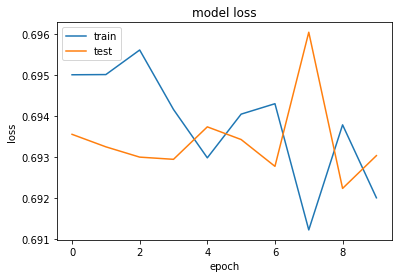

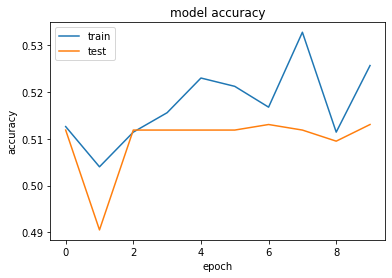

In [237]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [358]:
predictions = model.predict(X_test)
predictions

array([[0.5904704 ],
       [0.5690032 ],
       [0.41643104],
       ...,
       [0.2798969 ],
       [0.41975906],
       [0.5941305 ]], dtype=float32)

In [197]:
y_test

array([1, 0, 1, ..., 0, 1, 1])